In [246]:
import construction as cs
import matplotlib.pyplot as plt

### read font
from matplotlib import font_manager

font_dirs = ['Barlow/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load generated graphs

In [247]:
def load_origin_graph(file_name,gap=299):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    gap = 299 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graph(file_name):
    path = "../Generated_graphs/Multiple_run/"+file_name+"/"
    gap = 299 
    graphs = []
    for i in os.listdir(path):
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs


def load_dym_graph(file_name):
    path = "../Competitors_generated_graphs/Dymond/Multiple_run/"+file_name+"/"
    gap = 0 
    graphs = []
    for i in os.listdir(path):
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

def load_stm_graph(file_name):
    path = "../Competitors_generated_graphs/STM/Multiple_run/"+file_name+"/"
    gap = 0 
    graphs = []
    for i in os.listdir(path):
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

def load_tag_graph(file_name):
    path = "../Competitors_generated_graphs/TagGen/Multiple_run/"+file_name+"/"
    gap = 0 
    graphs = []
    for i in os.listdir(path):
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

In [248]:
import networkx as nx
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from topological_metrics import *

import os

# Compute and store topological stuff

# connected components

In [264]:
file_name = "InVS13"
#file_name = "LH10"
#file_name = "High_School11"


ori = load_origin_graph(file_name)
etn_gen = load_ETNgen_graph(file_name)
dym_gen = load_dym_graph(file_name)
stm_gen = load_stm_graph(file_name)
tag_gen = load_tag_graph(file_name)

../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym7.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym8.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym4.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym6.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym1.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym5.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym2.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym3.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym9.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym0.dat
../Competitors_generated_graphs/STM/Multiple_run/InVS13/InVS13_STM_3.dat
../Competitors_generated_graphs/STM/Multiple_run/InVS13/InVS13_STM_7.dat
../Competitors_generated_graphs/STM/Multiple_run/InVS13/InVS13_STM_9.dat
../Competitors_generated_graphs

In [265]:
len(ori),len(etn_gen[0]),len(stm_gen[0]),len(tag_gen[0]),len(dym_gen[0])

(3293, 3294, 3152, 3293, 3389)

In [266]:
len([len(i) for i in list(nx.connected_components(graph))])

169

In [267]:
res = []
for graph in ori:
    res.append(len([len(i) for i in list(nx.connected_components(graph))]))# if len(i)>1]))
    
res_e = []
for graph in etn_gen[0]:
    res_e.append(len([len(i) for i in list(nx.connected_components(graph))]))# if len(i)>1]))
    
res_t = []
for graph in tag_gen[0]:
    res_t.append(len([len(i) for i in list(nx.connected_components(graph))]))# if len(i)>1]))
    
res_d = []
for graph in dym_gen[0]:
    res_d.append(len([len(i) for i in list(nx.connected_components(graph))]))# if len(i)>1]))
    
res_s = []
for graph in stm_gen[0]:
    res_s.append(len([len(i) for i in list(nx.connected_components(graph))]))# if len(i)>1]))

In [268]:
from scipy.stats import ks_2samp

print("etn",ks_2samp(res,res_e)[0])
print("stm",ks_2samp(res,res_s)[0])
print("tag",ks_2samp(res,res_t)[0])
print("dym",ks_2samp(res,res_d)[0])

etn 0.055326923903088944
stm 1.0
tag 0.30610385666565443
dym 0.6633855069772994


{'bodies': [<matplotlib.collections.PolyCollection at 0x7f31f0d6fdf0>]}

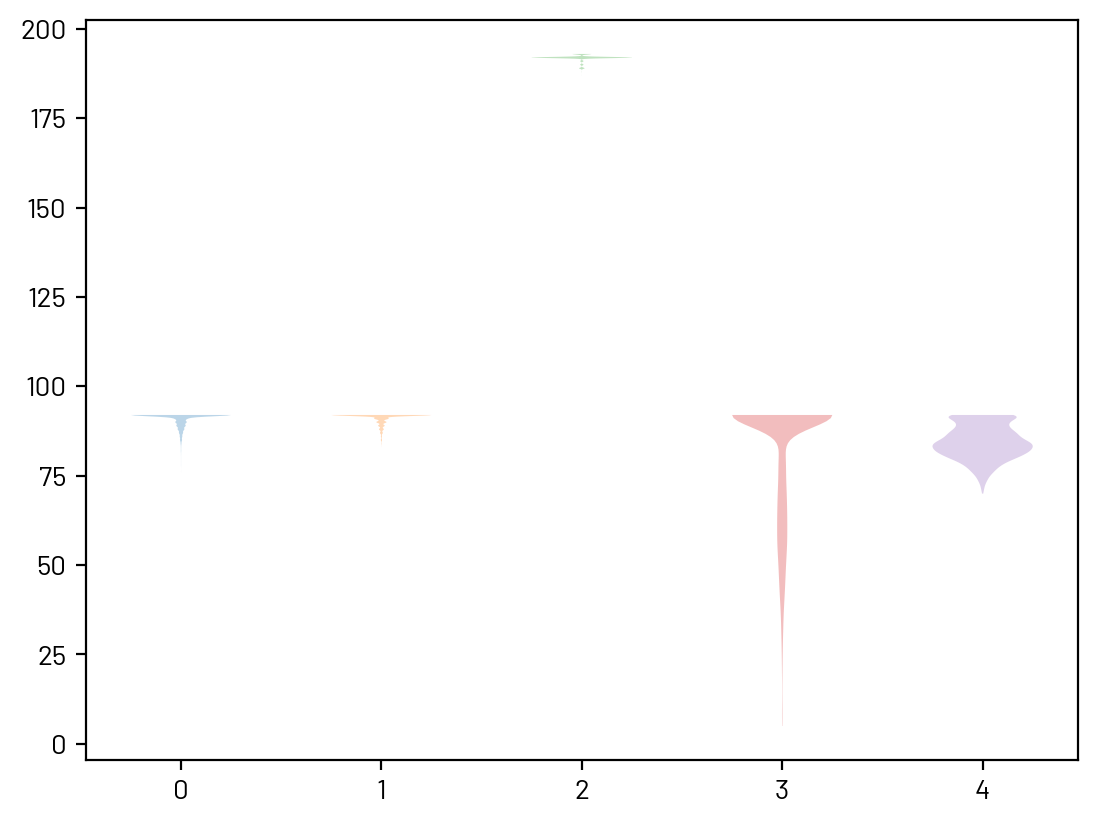

In [274]:
plt.violinplot(res,positions=[0], showmeans=False, showmedians=False,showextrema=False)
plt.violinplot(res_e,positions=[1], showmeans=False, showmedians=False,showextrema=False)
plt.violinplot(res_s,positions=[2], showmeans=False, showmedians=False,showextrema=False)
plt.violinplot(res_t,positions=[3], showmeans=False, showmedians=False,showextrema=False)
plt.violinplot(res_d,positions=[4], showmeans=False, showmedians=False,showextrema=False)

# graph aggregato
## aspl

In [12]:
file_name = "InVS13"
file_name = "LH10"
file_name = "High_School11"


ori = load_origin_graph(file_name)
etn_gen = load_ETNgen_graph(file_name)
dym_gen = load_dym_graph(file_name)
stm_gen = load_stm_graph(file_name)
tag_gen = load_tag_graph(file_name)

../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym1.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym7.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym8.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym6.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym3.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym0.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym9.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym5.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym4.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym2.dat
../Competitors_generated_graphs/STM/Multiple_run/High_School11/High_School11_STM_2.dat
../Competitors_generate

In [13]:
def to_aggregated_nx(graphs):
    G = nx.Graph()
    for g in graphs:
        G.add_edges_from(g.edges())
    return G

In [14]:
g = to_aggregated_nx(ori)
ori_res = nx.average_shortest_path_length(g)
print("ori",nx.average_shortest_path_length(g))

res = []
for gr in etn_gen:
    g = to_aggregated_nx(gr)
    res.append(nx.average_shortest_path_length(g))
    
print("etn",np.mean(res),np.std(res))
print("[",ori_res - np.mean(res),",",np.std(res),"]")

res = []
for gr in stm_gen:
    g = to_aggregated_nx(gr)
    #if not nx.is_connected(g):
    #    largest_cc = max(nx.connected_components(g), key=len) # get the biggest connected components
    #    g = g.subgraph(largest_cc).copy()  # get subgrph
    if nx.is_connected(g):
        res.append(nx.average_shortest_path_length(g))
print("stm",np.mean(res),np.std(res))
print("[",ori_res - np.mean(res),",",np.std(res),"]")



res = []
for gr in tag_gen:
    g = to_aggregated_nx(gr)
    res.append(nx.average_shortest_path_length(g))
print("tag",np.mean(res),np.std(res))
print("[",ori_res - np.mean(res),",",np.std(res),"]")

res = []
for gr in dym_gen:
    g = to_aggregated_nx(gr)
    res.append(nx.average_shortest_path_length(g))
print("dym",np.mean(res),np.std(res))
print("[",ori_res - np.mean(res),",",np.std(res),"]")

ori 1.948063492063492
etn 1.6245460317460316 0.0109536672812598
[ 0.3235174603174604 , 0.0109536672812598 ]
stm 2.5859861787833274 0.047886986527782845
[ -0.6379226867198353 , 0.047886986527782845 ]
tag 1.3639788359788358 0.19747166359027524
[ 0.5840846560846562 , 0.19747166359027524 ]
dym 1.3978867209850434 0.05735514665844567
[ 0.5501767710784486 , 0.05735514665844567 ]


In [ ]:
invs
(0.31335403726708067,0.00550078579151765),
(0.029854982070633307,0.06023285081321212),
(0.5961299569995222, 0.264054878968325),
(0.6677777777777778,0.0165899898343224),

lh 
( 0.42266666666666675 , 0.011998917787956411 ),
( -0.48443606604403344 , 0.0564648510734005 ),
( 0.21736936936936946 , 0.16346803924286843 ),
( 0.14984647244069804 , 0.1460067338632974 )

hs
[ 0.3235174603174604 , 0.0109536672812598 ]
[ -0.6379226867198353 , 0.047886986527782845 ]
[ 0.5840846560846562 , 0.19747166359027524 ]
[ 0.5501767710784486 , 0.05735514665844567 ]

# s metric

In [53]:
file_name = "InVS13"
file_name = "LH10"
file_name = "High_School11"

ori = load_origin_graph(file_name)
etn_gen = load_ETNgen_graph(file_name)
dym_gen = load_dym_graph(file_name)
stm_gen = load_stm_graph(file_name)
tag_gen = load_tag_graph(file_name)

../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym1.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym7.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym8.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym6.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym3.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym0.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym9.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym5.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym4.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym2.dat
../Competitors_generated_graphs/STM/Multiple_run/High_School11/High_School11_STM_2.dat
../Competitors_generate

In [54]:
# s metric come in 16 dymond
def s_metric(graphs):
    res = []
    res_in = 0
    for i,j in g.edges():
        d_i = g.degree(i)
        d_j = g.degree(j)
        res_in = res_in + d_i*d_j
    return res_in

In [55]:
res_ori = s_metric(ori)

In [56]:
res_etn = []
for gr in etn_gen:
    g = to_aggregated_nx(gr)
    res_etn.append(s_metric(g))    
res_etn = [np.mean(res_etn),np.std(res_etn)]

res_stm = []
for gr in stm_gen:
    g = to_aggregated_nx(gr)
    #if not nx.is_connected(g):
    #    largest_cc = max(nx.connected_components(g), key=len) # get the biggest connected components
    #    g = g.subgraph(largest_cc).copy()  # get subgrph
    if nx.is_connected(g):
        res_stm.append(s_metric(g))
res_stm = [np.mean(res_stm),np.std(res_stm)]

res_tag = []
for gr in tag_gen:
    g = to_aggregated_nx(gr)
    res_tag.append(s_metric(g))
res_tag = [np.mean(res_tag),np.std(res_tag)]

res_dym = []
for gr in dym_gen:
    g = to_aggregated_nx(gr)
    res_dym.append(s_metric(g))
res_dym = [np.mean(res_dym),np.std(res_dym)]

In [57]:
print(res_ori - res_etn[0], res_etn[1])
print(res_ori - res_stm[0], res_stm[1])
print(res_ori - res_tag[0], res_tag[1])
print(res_ori - res_dym[0], res_dym[1])

-7140500.9 617645.3569687787
-2287805.5 138331.65329110326
-46346781.0 29931538.316608094
-1640299.0 734031.8945490039


In [58]:
invs
1250067.3 78324.66566037801
2397440.75 2502688.0403472558
56194.09999999963 9373845.068694538 #tolto il negativo
16440.099999999627 812115.5922352988#tolto il negativo


lh10
5331542.0 333342.8752218952
10977079.75 410285.7884011308
8902336.2 3746975.56843198
14045249.5 10113.307760075335

hs11
7140500.9 617645.3569687787  #tolto il negativo
2287805.5 138331.65329110326#tolto il negativo
46346781.0 29931538.316608094#tolto il negativo
1640299.0 734031.8945490039#tolto il negativo

SyntaxError: invalid syntax (2406191419.py, line 2)

In [62]:
1250067.3/2397440.75,2397440.75/2397440.75,56194.09999999963/2397440.75,16440.099999999627/2397440.75,

(0.5214173906070463, 1.0, 0.023439202824928885, 0.006857354034713737)

In [64]:
5331542.0 /14045249.5,10977079.75 /14045249.5,8902336.2 /14045249.5,14045249.5 /14045249.5


(0.37959752868754665, 0.781551068209931, 0.633832542455013, 1.0)

In [66]:
7140500.9 /46346781,2287805.5 /46346781,46346781.0/46346781,1640299.0 /46346781

(0.1540668142626777, 0.04936277019972541, 1.0, 0.03539186464751457)

In [44]:
MAX = np.max([res_ori,max(res_etn),max(res_stm),max(res_tag),max(res_dym)])
res_etnN = res_etn/MAX
res_stmN = res_stm/MAX
res_tagN = res_tag/MAX
res_dymN = res_dym/MAX

In [45]:
np.mean(res_etnN),np.std(res_etnN)

(0.05803559242706219, 0.05248739329161747)

In [36]:
MAX

25507642

# asp e s-metric e clust e ass
# agg 1 ora

In [238]:
def load_origin_graph(file_name,gap=299):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    gap = (300*12)-1 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graph(file_name):
    path = "../Generated_graphs/Multiple_run/"+file_name+"/"
    gap = (300*12)-1 
    graphs = []
    for i in os.listdir(path):
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs


def load_dym_graph(file_name):
    path = "../Competitors_generated_graphs/Dymond/Multiple_run/"+file_name+"/"
    gap = 12 
    graphs = []
    for i in os.listdir(path):
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

def load_stm_graph(file_name):
    path = "../Competitors_generated_graphs/STM/Multiple_run/"+file_name+"/"
    gap = 12 
    graphs = []
    for i in os.listdir(path):
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

def load_tag_graph(file_name):
    path = "../Competitors_generated_graphs/TagGen/Multiple_run/"+file_name+"/"
    gap = 12
    graphs = []
    for i in os.listdir(path):
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

In [239]:
import networkx as nx
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from topological_metrics import *

import os

In [7]:
file_name = "InVS13"
#file_name = "LH10"
#file_name = "High_School11"


ori = load_origin_graph(file_name)
etn_gen = load_ETNgen_graph(file_name)
dym_gen = load_dym_graph(file_name)
stm_gen = load_stm_graph(file_name)
tag_gen = load_tag_graph(file_name)

../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym7.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym8.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym4.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym6.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym1.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym5.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym2.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym3.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym9.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym0.dat
../Competitors_generated_graphs/STM/Multiple_run/InVS13/InVS13_STM_3.dat
../Competitors_generated_graphs/STM/Multiple_run/InVS13/InVS13_STM_7.dat
../Competitors_generated_graphs/STM/Multiple_run/InVS13/InVS13_STM_9.dat
../Competitors_generated_graphs

In [8]:
len(ori),len(etn_gen[0]),len(stm_gen[0]),len(tag_gen[0]),len(dym_gen[0])

(275, 275, 243, 254, 261)

In [140]:
res = []
for graph in ori:
    largest_cc = max(nx.connected_components(graph), key=len) # get the biggest connected components
    sub_G = graph.subgraph(largest_cc).copy()  # get subgrph
    res.append(nx.average_shortest_path_length(sub_G))
    
np.save("topology_results/original_distributions/"+file_name+"/hasp.npy",res)

In [141]:
def aspl_hour(comp):
    res = []
    for graphs in comp:
        tmp = []
        for graph in graphs:
            largest_cc = max(nx.connected_components(graph), key=len) # get the biggest connected components
            sub_G = graph.subgraph(largest_cc).copy()  # get subgrph
            tmp.append(nx.average_shortest_path_length(sub_G))
        res.append(tmp)
        
    return np.array(res,dtype=object)

In [142]:
res_etn = aspl_hour(etn_gen)
np.save("topology_results/etngen/Multiple_run/distributions/"+file_name+"/hasp.npy",res_etn)

res_stm = aspl_hour(stm_gen)
np.save("topology_results/stmgen/Multiple_run/distributions/"+file_name+"/hasp.npy",res_stm)

res_tag = aspl_hour(tag_gen)
np.save("topology_results/taggen/Multiple_run/distributions/"+file_name+"/hasp.npy",res_tag)


res_dym = aspl_hour(dym_gen)
np.save("topology_results/dymgen/Multiple_run/distributions/"+file_name+"/hasp.npy",res_dym)

from scipy.stats import ks_2samp

print("etn",ks_2samp(res,res_etn[0])[0])
print("stm",ks_2samp(res,res_stm[0])[0])
print("tag",ks_2samp(res,res_tag[0])[0])
print("dym",ks_2samp(res,res_dym[0])[0])

# smetric

In [175]:
file_name = "InVS13"
file_name = "LH10"
file_name = "High_School11"


ori = load_origin_graph(file_name)
etn_gen = load_ETNgen_graph(file_name)
dym_gen = load_dym_graph(file_name)
stm_gen = load_stm_graph(file_name)
tag_gen = load_tag_graph(file_name)

../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym1.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym7.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym8.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym6.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym3.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym0.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym9.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym5.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym4.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym2.dat
../Competitors_generated_graphs/STM/Multiple_run/High_School11/High_School11_STM_2.dat
../Competitors_generate

In [176]:
# s metric come in 16 dymond
def s_metric(graphs):
    res = []
    res_in = 0
    for i,j in graphs.edges():
        d_i = graphs.degree(i)
        d_j = graphs.degree(j)
        res_in = res_in + d_i*d_j
    return res_in

In [177]:
res = []

for g in ori:
    res.append(s_metric(g))
    
    
np.save("topology_results/original_distributions/"+file_name+"/hs_metric.npy",res)

In [178]:
def smetric_hour(comp):
    res = []
    for graphs in comp:
        tmp = []
        for graph in graphs:
            tmp.append(s_metric(graph))
        res.append(tmp)
        
    return np.array(res,dtype=object)

In [179]:
res_etn = smetric_hour(etn_gen)
np.save("topology_results/etngen/Multiple_run/distributions/"+file_name+"/hs_metric.npy",res_etn)

In [180]:
res_stm = smetric_hour(stm_gen)
np.save("topology_results/stmgen/Multiple_run/distributions/"+file_name+"/hs_metric.npy",res_stm)

res_tag = smetric_hour(tag_gen)
np.save("topology_results/taggen/Multiple_run/distributions/"+file_name+"/hs_metric.npy",res_tag)

res_dym = smetric_hour(dym_gen)
np.save("topology_results/dymgen/Multiple_run/distributions/"+file_name+"/hs_metric.npy",res_dym)

In [181]:
from scipy.stats import ks_2samp

print("etn",ks_2samp(res,res_etn[0])[0])
print("stm",ks_2samp(res,res_stm[0])[0])
print("tag",ks_2samp(res,res_tag[0])[0])
print("dym",ks_2samp(res,res_dym[0])[0])


etn 0.14473684210526316
stm 0.5503759398496241
tag 0.45827067669172933
dym 0.35827067669172935


# clust
tieni anche gli 0

In [64]:
file_name = "InVS13"
#file_name = "LH10"
#file_name = "High_School11"


ori = load_origin_graph(file_name)
etn_gen = load_ETNgen_graph(file_name)
dym_gen = load_dym_graph(file_name)
stm_gen = load_stm_graph(file_name)
tag_gen = load_tag_graph(file_name)

../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym7.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym8.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym4.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym6.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym1.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym5.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym2.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym3.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym9.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym0.dat
../Competitors_generated_graphs/STM/Multiple_run/InVS13/InVS13_STM_3.dat
../Competitors_generated_graphs/STM/Multiple_run/InVS13/InVS13_STM_7.dat
../Competitors_generated_graphs/STM/Multiple_run/InVS13/InVS13_STM_9.dat
../Competitors_generated_graphs

In [65]:
len(ori),len(etn_gen[0]),len(stm_gen[0]),len(tag_gen[0]),len(dym_gen[0])

(275, 275, 243, 254, 261)

In [66]:
res = []
for graph in ori:
    a = list(nx.cluster.clustering(graph).values())
    for i in a:
         #if i > 0:
        if True:
            res.append(i)

In [67]:
np.save("topology_results/original_distributions/"+file_name+"/hclus_with0.npy",res)

In [68]:
def clust_hour(comp):
    res = []
    for graphs in comp:      
        tmp = []
        for graph in graphs:
            a = list(nx.cluster.clustering(graph).values())
            for i in a:
                #if i > 0:
                if True:
                    tmp.append(i)
        res.append(tmp)
        
    return np.array(res,dtype=object)

In [69]:
res_etn = clust_hour(etn_gen)
np.save("topology_results/etngen/Multiple_run/distributions/"+file_name+"/hclus_with0.npy",res_etn)

res_stm = clust_hour(stm_gen)
np.save("topology_results/stmgen/Multiple_run/distributions/"+file_name+"/hclus_with0.npy",res_stm)

res_tag = clust_hour(tag_gen)
np.save("topology_results/taggen/Multiple_run/distributions/"+file_name+"/hclus_with0.npy",res_tag)

res_dym = clust_hour(dym_gen)
np.save("topology_results/dymgen/Multiple_run/distributions/"+file_name+"/hclus_with0.npy",res_dym)

In [70]:
from scipy.stats import ks_2samp

print("etn",ks_2samp(res,res_etn[0])[0])
print("stm",ks_2samp(res,res_stm[0])[0])
print("tag",ks_2samp(res,res_tag[0])[0])
print("dym",ks_2samp(res,res_dym[0])[0])

etn 0.01588932806324106
stm 0.00872669118597702
tag 0.25131181724814045
dym 0.1792202383656657


# hour ass


In [191]:
file_name = "InVS13"
file_name = "LH10"
file_name = "High_School11"


ori = load_origin_graph(file_name)
etn_gen = load_ETNgen_graph(file_name)
dym_gen = load_dym_graph(file_name)
stm_gen = load_stm_graph(file_name)
tag_gen = load_tag_graph(file_name)

../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym1.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym7.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym8.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym6.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym3.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym0.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym9.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym5.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym4.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym2.dat
../Competitors_generated_graphs/STM/Multiple_run/High_School11/High_School11_STM_2.dat
../Competitors_generate

In [192]:
len(ori),len(etn_gen[0]),len(stm_gen[0]),len(tag_gen[0]),len(dym_gen[0])

(76, 76, 70, 70, 70)

In [193]:
res = []
for graph in ori:
    a = nx.assortativity.degree_assortativity_coefficient(graph)
    if not np.isnan(a):
        res.append(a)
np.save("topology_results/original_distributions/"+file_name+"/hass.npy",res)

In [194]:
def ass_hour(comp):
    res = []
    for graphs in comp: 
        tmp = []
        for graph in graphs:
            a = nx.assortativity.degree_assortativity_coefficient(graph)
            if not np.isnan(a):
                tmp.append(a)
                
        res.append(tmp)
    return np.array(res,dtype=object)

In [195]:
res_etn = ass_hour(etn_gen)
np.save("topology_results/etngen/Multiple_run/distributions/"+file_name+"/hass.npy",res_etn)

res_stm = ass_hour(stm_gen)
np.save("topology_results/stmgen/Multiple_run/distributions/"+file_name+"/hass.npy",res_stm)

res_tag = ass_hour(tag_gen)
np.save("topology_results/taggen/Multiple_run/distributions/"+file_name+"/hass.npy",res_tag)

res_dym = ass_hour(dym_gen)
np.save("topology_results/dymgen/Multiple_run/distributions/"+file_name+"/hass.npy",res_dym)

In [196]:
from scipy.stats import ks_2samp

print("etn",ks_2samp(res,res_etn[0])[0])
print("stm",ks_2samp(res,res_stm[0])[0])
print("tag",ks_2samp(res,res_tag[0])[0])
print("dym",ks_2samp(res,res_dym[0])[0])

etn 0.5691554467564259
stm 0.6075851393188855
tag 0.9210526315789473
dym 0.5129186602870813


# con comp

In [240]:
file_name = "InVS13"
file_name = "LH10"
#file_name = "High_School11"


ori = load_origin_graph(file_name)
etn_gen = load_ETNgen_graph(file_name)
dym_gen = load_dym_graph(file_name)
stm_gen = load_stm_graph(file_name)
tag_gen = load_tag_graph(file_name)

len(ori),len(etn_gen[0]),len(stm_gen[0]),len(tag_gen[0]),len(dym_gen[0])

../Competitors_generated_graphs/Dymond/Multiple_run/LH10/LH10_dym7.dat
../Competitors_generated_graphs/Dymond/Multiple_run/LH10/LH10_dym8.dat
../Competitors_generated_graphs/Dymond/Multiple_run/LH10/LH10_dym4.dat
../Competitors_generated_graphs/Dymond/Multiple_run/LH10/LH10_dym5.dat
../Competitors_generated_graphs/Dymond/Multiple_run/LH10/LH10_dym9.dat
../Competitors_generated_graphs/Dymond/Multiple_run/LH10/LH10_dym3.dat
../Competitors_generated_graphs/Dymond/Multiple_run/LH10/LH10_dym0.dat
../Competitors_generated_graphs/Dymond/Multiple_run/LH10/LH10_dym1.dat
../Competitors_generated_graphs/Dymond/Multiple_run/LH10/LH10_dym2.dat
../Competitors_generated_graphs/Dymond/Multiple_run/LH10/LH10_dym6.dat
../Competitors_generated_graphs/STM/Multiple_run/LH10/LH10_STM_7.dat
../Competitors_generated_graphs/STM/Multiple_run/LH10/LH10_STM_9.dat
../Competitors_generated_graphs/STM/Multiple_run/LH10/LH10_STM_5.dat
../Competitors_generated_graphs/STM/Multiple_run/LH10/LH10_STM_6.dat
../Competitors

(97, 97, 76, 90, 90)